<a href="https://colab.research.google.com/github/bkim9/Resume/blob/main/19_1_What_Is_Hyperparameter_Optimization%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install d2l==1.0.3
!pip install -U mxnet-cu112==1.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: n

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 MB 2.5 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


Objectvie Function & Configuration Space

In [ ]:
import numpy as np
import torch
from scipy import stats
from torch import nn
from d2l import torch as d2l

In [ ]:
d2l.DATA_HUB['aclImdb'] = (d2l.DATA_URL + 'aclImdb_v1.tar.gz',
                          '01ada507287d82875905620988597833ad4e0903')

data_dir = d2l.download_extract('aclImdb', 'aclImdb')

In [ ]:
class HPOTrainer(d2l.Trainer):
    def validation_error(self):
        self.model.eval()
        accuracy = 0
        val_batch_idx = 0
        for batch in self.val_dataloader:
            with torch.no_grad():
                x, y = self.prepare_batch(batch)
                y_hat = self.model(x)
                accuracy += self.model.accuracy(y_hat, y)
            val_batch_idx += 1
        return 1 -  accuracy / val_batch_idx

In [ ]:
class HPOTrainer(d2l.Trainer):
  def validation_error(self):
    self.model.eval()
    accuracy = 0
    val_batch_idx = 0
    for batch in self.val_dataloader:
      with torch.no_grad():
        x, y = self.prepare_batch(batch)
        y_hat = self.model(x)
        accuracy += self.model.accuracy(y_hat, y)
      val_batch_idx += 1
    return 1 - accuracy / val_batch_idx

In [ ]:
def hpo_objective_softmax_classification(config, max_epochs=8):
  learning_rate = config["learning_rate"]
  trainer= d2l.HPOTrainer(max_epochs=max_epochs)
  data = d2l.FashionMNIST(batch_size=16)
  model = d2l.SoftmaxRegression(num_outputs=10, lr=learning_rate)
  trainer.fit(model=model, data=data)
  return trainer.validation_error().detach().numpy()

In [ ]:
config_space = {"learning_rate": stats.loguniform(1e-4, 1)}

19.1.2 Random Search

    validation_error = 0.21619999408721924


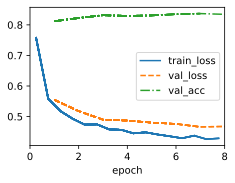

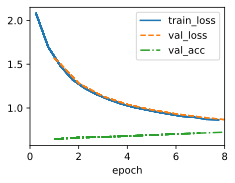

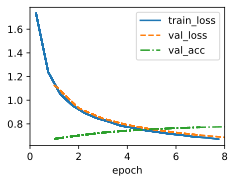

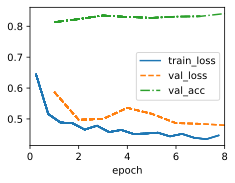

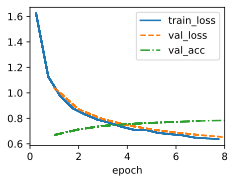

In [ ]:
errors, values = [], []
num_iterations = 5

for i in range(num_iterations):
  learning_rate = config_space["learning_rate"].rvs()
  print(f"Trial {i}: learning_rate = {learning_rate}")
  y = hpo_objective_softmax_classification({"learning_rate": learning_rate})
  print(f"    validation_error = {y}")
  values.append(learning_rate)
  errors.append(y)

In [ ]:
best_idx = np.argmin(errors)
print(f"optimal learning rate = {values[best_idx]}")

optimal learning rate = 0.07716416521180255
